# AutoScout24 Listings

## Original Data

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import scipy.stats
import seaborn as sns

In [2]:
listings = pd.read_csv("test_data/listings_shorted.csv", sep=",")
listings.head()

,GUID,MAKENAME,MAKENAME_LINK,MODELNAME,TITLE,REGISTRATION_YEAR,MILEAGE,FUEL_TYPE,ARTICLE_OFFER_TYPE,BODY_COLOR,...,ELECTRIC_CONSUMPTION_MIXED,EFFICIENCY_CLASS,CO2_EMISSION,PRICE_LABEL,SEARCH_QUERY,VEHICLE_TYPE_ID,SEATS,DOORS,EMISSION_STICKER,FINANCING_RATE
0,50e507d3-8edf-40e7-931d-d4a172d85441,Volkswagen,Volkswagen,New Beetle,Volkswagen New Beetle Cabriolet 1.6,2003,210000,Benzin,Gebraucht,Silber,...,NaN,NaN,185.0,NaN,https://www.autoscout24.de/lst/volkswagen/new-...,Pkw,4,2,NaN,0.0
1,c0dbe46a-4513-407f-9e10-d8423b7913de,Audi,Audi,Q5,Audi Q5 2.0 TDI quattro,2010,156000,Diesel,Gebraucht,Grau,...,NaN,NaN,163.0,Hoher Preis,https://www.autoscout24.de/lst/audi/q5/re_2010...,Pkw,5,5,NaN,0.0
2,77a24a53-50cd-4bc9-b29f-02998ca84ea9,BMW,BMW,118,BMW 118 i Sport Line Sportsitze PDC Servotronic,2017,19531,Benzin,Gebraucht,Grau,...,NaN,A,116.0,NaN,https://www.autoscout24.de/lst/bmw/118/re_2017...,Pkw,5,5,min. 4 (Grün),0.0
3,1ceef883-3707-40b1-b723-42f2e6e59a14,Audi,Audi,A3,Audi A3 Lim. Ambiente*Xenon*Klima*SHZ*Teilleder,2015,49000,Benzin,Gebraucht,Blau,...,NaN,NaN,126.0,NaN,https://www.autoscout24.de/lst/audi/a3/re_2015...,Pkw,5,4,min. 4 (Grün),0.0
4,d6911e4a-54b7-443a-a95c-6bcbd23ae504,Opel,Opel,Astra,Opel Astra 1.4T Active Xenon PDC SHD Sitz+Lenk...,2013,85520,Benzin,Gebraucht,Schwarz,...,NaN,C,140.0,Sehr guter Preis,https://www.autoscout24.de/lst/opel/astra/re_2...,Pkw,5,5,min. 4 (Grün),0.0


In [3]:
listings.columns

Index(['GUID', 'MAKENAME', 'MAKENAME_LINK', 'MODELNAME', 'TITLE',
       'REGISTRATION_YEAR', 'MILEAGE', 'FUEL_TYPE', 'ARTICLE_OFFER_TYPE',
       'BODY_COLOR', 'POWER_IN_KW', 'HORSEPOWER', 'GEARING_TYPE', 'BODY_TYPE',
       'DEALER_OFFER', 'PRIVATE_OFFER', 'PREV_OWNERS', 'ACCIDENTED',
       'WARRANTY', 'PRICE_PUBLIC', 'EQUIPMENTS', 'CYLINDERS', 'EMISSION_CLASS',
       'PRIMARY_FUEL_TYPE', 'CONSUMPTION_HIGHWAY', 'CONSUMPTION_CITY',
       'CONSUMPTION_MIXED', 'ELECTRIC_CONSUMPTION_MIXED', 'EFFICIENCY_CLASS',
       'CO2_EMISSION', 'PRICE_LABEL', 'SEARCH_QUERY', 'VEHICLE_TYPE_ID',
       'SEATS', 'DOORS', 'EMISSION_STICKER', 'FINANCING_RATE'],
      dtype='object')

In [4]:
listings.describe()

,REGISTRATION_YEAR,MILEAGE,POWER_IN_KW,HORSEPOWER,PREV_OWNERS,WARRANTY,PRICE_PUBLIC,CYLINDERS,CONSUMPTION_HIGHWAY,CONSUMPTION_CITY,CONSUMPTION_MIXED,ELECTRIC_CONSUMPTION_MIXED,CO2_EMISSION,SEATS,DOORS,FINANCING_RATE
count,436.000000,436.000000,436.000000,436.000000,321.000000,74.000000,436.000000,236.000000,386.000000,386.000000,397.000000,4.000000,385.000000,436.000000,436.000000,436.000000
mean,2014.727064,79493.605505,112.059633,152.405963,1.470405,23.621622,18741.344037,4.093220,4.980311,7.280570,5.815365,15.725000,142.046753,4.752294,4.162844,36.750688
std,4.986538,61811.578221,58.389624,79.372672,0.724502,17.572318,16644.296562,1.067806,1.152423,2.481299,1.628903,3.024759,38.487524,1.081982,1.009652,106.061906
min,2000.000000,10.000000,37.000000,50.000000,1.000000,12.000000,350.000000,1.000000,3.200000,3.200000,2.300000,11.500000,3.000000,0.000000,0.000000,0.000000
25%,2011.000000,25830.000000,77.000000,105.000000,1.000000,12.000000,8280.000000,4.000000,4.200000,5.600000,4.700000,14.725000,118.000000,5.000000,4.000000,0.000000
50%,2016.000000,67600.500000,101.000000,137.000000,1.000000,12.000000,15000.000000,4.000000,4.700000,6.700000,5.500000,16.450000,136.000000,5.000000,4.000000,0.000000
75%,2019.000000,120999.250000,130.000000,177.000000,2.000000,24.000000,24703.750000,4.000000,5.500000,8.275000,6.500000,17.450000,159.000000,5.000000,5.000000,0.000000
max,2022.000000,272000.000000,485.000000,659.000000,5.000000,60.000000,169900.000000,12.000000,11.400000,21.800000,14.900000,18.500000,352.000000,8.000000,5.000000,1079.000000


In [5]:
print(listings)

                                     GUID       MAKENAME  MAKENAME_LINK  \
0    50e507d3-8edf-40e7-931d-d4a172d85441     Volkswagen     Volkswagen   
1    c0dbe46a-4513-407f-9e10-d8423b7913de           Audi           Audi   
2    77a24a53-50cd-4bc9-b29f-02998ca84ea9            BMW            BMW   
3    1ceef883-3707-40b1-b723-42f2e6e59a14           Audi           Audi   
4    d6911e4a-54b7-443a-a95c-6bcbd23ae504           Opel           Opel   
..                                    ...            ...            ...   
431  866d7faf-4291-486e-86b3-5cb287fada93          Mazda          Mazda   
432  5a14ccf6-397c-4d5c-806a-0e55cce96395         Nissan         Nissan   
433  ccd0c33c-c63c-44e5-81e9-dc27614c3bd4  Mercedes-Benz  Mercedes-Benz   
434  c4fbc0c1-4882-4358-81a4-9a2bcfcc7c8e  Mercedes-Benz  Mercedes-Benz   
435  fa0c3354-2400-4f3b-9c97-49ad6b3c5ef2       Corvette       Corvette   

      MODELNAME                                              TITLE  \
0    New Beetle              

## First Data Cleaning
We first drop all the columns that will not have an impact on the recommendation. For now, we also drop the location but we can access that at a later stage through the GUID.

In [6]:
listings = listings[listings.VEHICLE_TYPE_ID == "Pkw"]
listings = listings[listings.CO2_EMISSION <= 1000]

In [7]:
sigVars = ['GUID','REGISTRATION_YEAR', 'MILEAGE', 'POWER_IN_KW', 'HORSEPOWER', 'GEARING_TYPE',
       'WARRANTY',
       'PRICE_PUBLIC', 'CYLINDERS', 'EMISSION_CLASS', 'PRIMARY_FUEL_TYPE',
       'CONSUMPTION_HIGHWAY', 'CONSUMPTION_CITY', 'CONSUMPTION_MIXED',
       'ELECTRIC_CONSUMPTION_MIXED', 'EFFICIENCY_CLASS', 'CO2_EMISSION', 'EMISSION_STICKER']

In [8]:
listings_processed = listings[sigVars]
listings_processed.head()

,GUID,REGISTRATION_YEAR,MILEAGE,POWER_IN_KW,HORSEPOWER,GEARING_TYPE,WARRANTY,PRICE_PUBLIC,CYLINDERS,EMISSION_CLASS,PRIMARY_FUEL_TYPE,CONSUMPTION_HIGHWAY,CONSUMPTION_CITY,CONSUMPTION_MIXED,ELECTRIC_CONSUMPTION_MIXED,EFFICIENCY_CLASS,CO2_EMISSION,EMISSION_STICKER
0,50e507d3-8edf-40e7-931d-d4a172d85441,2003,210000,75,102,Schaltgetriebe,NaN,3400,4.0,Euro 4,NaN,6.0,10.5,7.7,NaN,NaN,185.0,NaN
1,c0dbe46a-4513-407f-9e10-d8423b7913de,2010,156000,125,170,Automatik,NaN,16000,4.0,Euro 5,NaN,5.6,7.3,6.2,NaN,NaN,163.0,NaN
2,77a24a53-50cd-4bc9-b29f-02998ca84ea9,2017,19531,101,137,Schaltgetriebe,NaN,18450,3.0,Euro 6,NaN,4.3,6.2,5.0,NaN,A,116.0,min. 4 (Grün)
3,1ceef883-3707-40b1-b723-42f2e6e59a14,2015,49000,92,125,Schaltgetriebe,NaN,14200,NaN,Euro 6,NaN,4.4,6.7,5.3,NaN,NaN,126.0,min. 4 (Grün)
4,d6911e4a-54b7-443a-a95c-6bcbd23ae504,2013,85520,103,140,Schaltgetriebe,NaN,7990,4.0,Euro 5,Elektro/Benzin,4.7,7.9,5.9,NaN,C,140.0,min. 4 (Grün)


# Data Visualization
Let's focus on numeric data for now and visualize that. **Next step: One-hot or Integer encode categorical data!**

In [9]:
numericVars = ['MILEAGE','POWER_IN_KW', 'HORSEPOWER',
       'PRICE_PUBLIC',
       'CYLINDERS',
       'CONSUMPTION_HIGHWAY', 'CONSUMPTION_CITY', 'CONSUMPTION_MIXED',
       'CO2_EMISSION']
listings_numeric = listings[numericVars]
listings_numeric.describe()

,MILEAGE,POWER_IN_KW,HORSEPOWER,PRICE_PUBLIC,CYLINDERS,CONSUMPTION_HIGHWAY,CONSUMPTION_CITY,CONSUMPTION_MIXED,CO2_EMISSION
count,385.000000,385.000000,385.000000,385.000000,207.000000,370.000000,370.000000,381.000000,385.000000
mean,79992.659740,110.789610,150.683117,18748.987013,4.072464,4.967027,7.241622,5.789501,142.046753
std,60987.760071,55.046097,74.823566,16829.271306,0.980175,1.145011,2.422892,1.601807,38.487524
min,10.000000,37.000000,50.000000,350.000000,3.000000,3.200000,3.200000,2.300000,3.000000
25%,25900.000000,80.000000,109.000000,8250.000000,4.000000,4.200000,5.600000,4.700000,118.000000
50%,69000.000000,101.000000,137.000000,15290.000000,4.000000,4.700000,6.700000,5.500000,136.000000
75%,122650.000000,130.000000,177.000000,24330.000000,4.000000,5.500000,8.200000,6.500000,159.000000
max,258000.000000,467.000000,635.000000,169900.000000,12.000000,11.400000,21.800000,14.900000,352.000000


In [10]:
import matplotlib.pyplot as plt
import matplotlib

n_std = 2
for col in listings_numeric.columns:
    mean = listings_numeric[col].mean()
    sd = listings_numeric[col].std()
    listings_numeric = listings_numeric[listings_numeric[col] <= mean+(n_std*sd)]


In [11]:
listings_numeric.describe()

,MILEAGE,POWER_IN_KW,HORSEPOWER,PRICE_PUBLIC,CYLINDERS,CONSUMPTION_HIGHWAY,CONSUMPTION_CITY,CONSUMPTION_MIXED,CO2_EMISSION
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,64228.131034,94.641379,128.779310,16327.524138,3.765517,4.386207,6.117931,5.024138,122.441379
std,49044.455005,26.903035,36.600028,8124.256543,0.425144,0.541554,1.207826,0.753904,19.726560
min,25.000000,37.000000,50.000000,350.000000,3.000000,3.200000,3.200000,3.500000,3.000000
25%,19900.000000,80.000000,109.000000,10900.000000,4.000000,4.000000,5.200000,4.500000,112.000000
50%,56000.000000,96.000000,131.000000,15990.000000,4.000000,4.300000,6.000000,5.000000,120.000000
75%,101731.000000,110.000000,150.000000,21999.000000,4.000000,4.700000,7.000000,5.600000,137.000000
max,180000.000000,169.000000,230.000000,36000.000000,4.000000,5.800000,8.700000,6.600000,164.000000


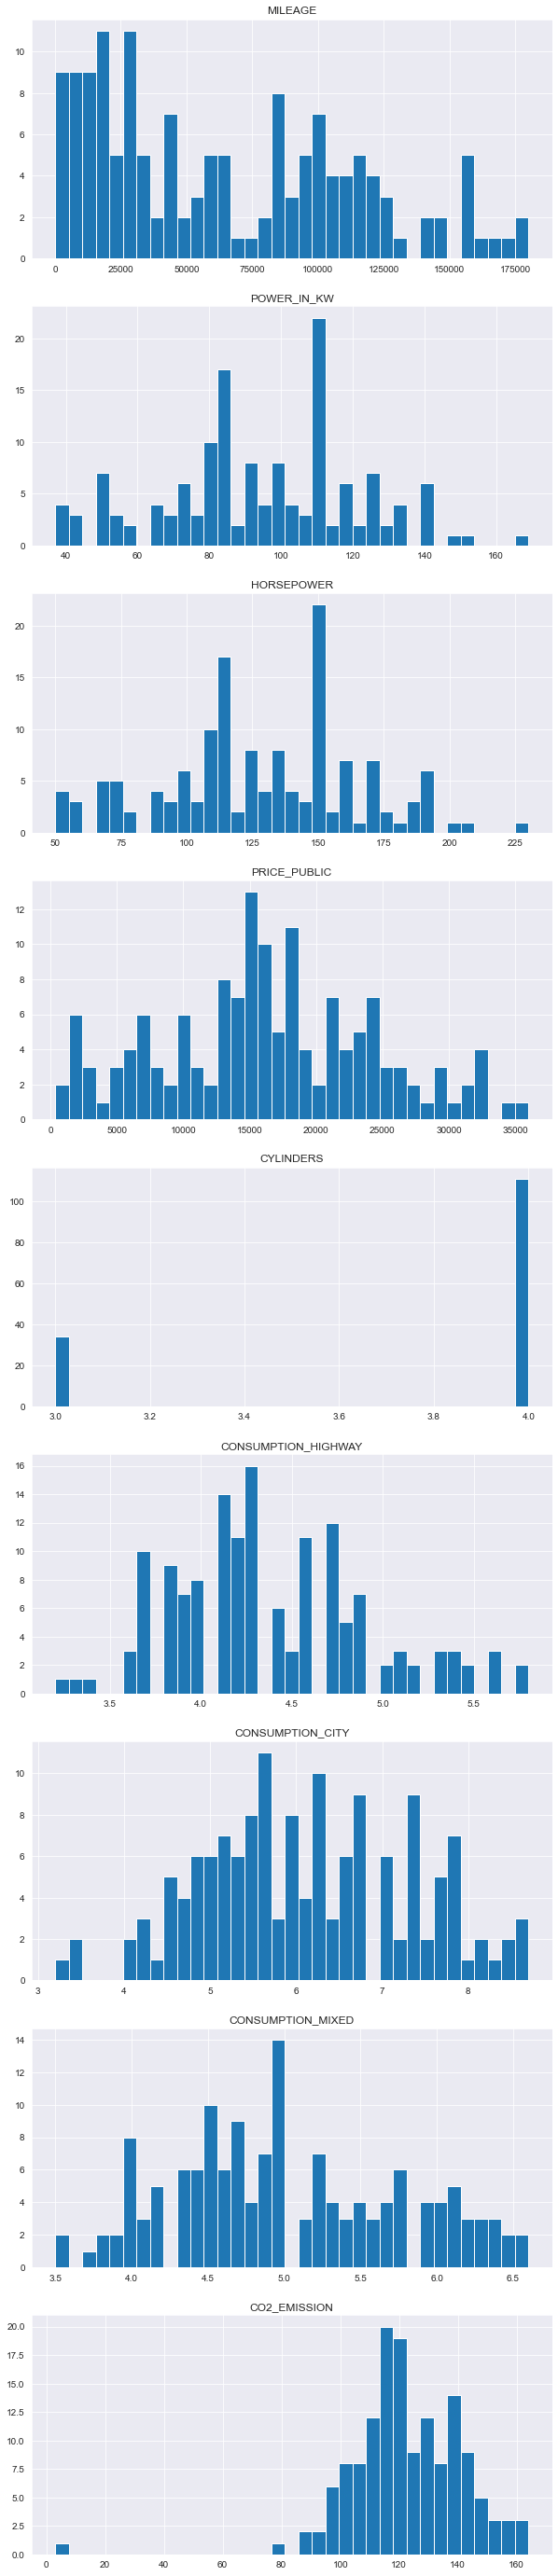

In [12]:
fig, axs = plt.subplots(len(listings_numeric.columns), figsize=(10, 50))

for n, col in enumerate(listings_numeric.columns):
    axs[n].set_title(col)
    listings_numeric[col].hist(ax=axs[n], bins= 35)

IGNORE THE FOLLOWING TWO CELLS

In [13]:
def fit_function(x, A, beta, B, mu, sigma):
    return A * np.exp(-x / beta) + B * np.exp(-1.0 * (x - mu) ** 2 / (2 * sigma ** 2))

CONTINUE HERE

C:\Users\jccli\PycharmProjects\akina\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HORSEPOWER', ylabel='Density'>

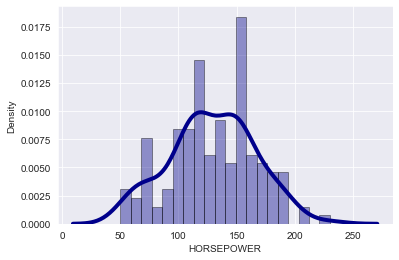

In [17]:
sns.distplot(listings_numeric['HORSEPOWER'], hist=True, kde=True,
             bins=int(20), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             )



<AxesSubplot:>

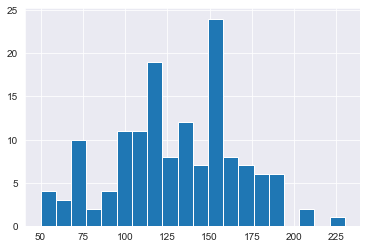

In [18]:
listings_numeric['HORSEPOWER'].hist(bins= 20)


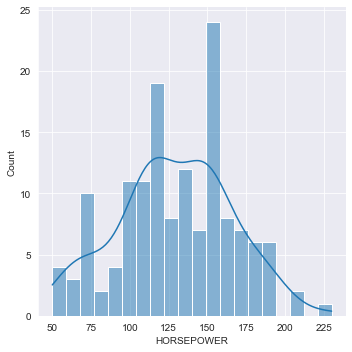

In [32]:
# sns.displot(listings_numeric['HORSEPOWER'], kind="kde", bw_adjust=0.75)
sns.displot(listings_numeric['HORSEPOWER'], stat = 'count', kde = True, bins = 20)

C:\Users\jccli\PycharmProjects\akina\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


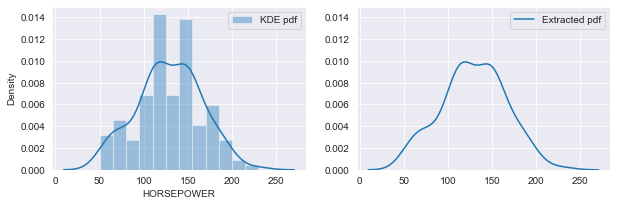

In [25]:
fig, axs = plt.subplots(1,2, figsize=(10,3))

ax1 = sns.distplot(listings_numeric['HORSEPOWER'], ax=axs[0], label='KDE pdf')
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax1.legend()

axs[1].plot(xfit, yfit, label='Extracted pdf')
axs[1].set_ylim(ax1.get_ylim())
plt.legend()

[  9.41840848  10.73078629  12.04316409  13.3555419   14.6679197
  15.98029751  17.29267531  18.60505311  19.91743092  21.22980872
  22.54218653  23.85456433  25.16694213  26.47931994  27.79169774
  29.10407555  30.41645335  31.72883116  33.04120896  34.35358676
  35.66596457  36.97834237  38.29072018  39.60309798  40.91547578
  42.22785359  43.54023139  44.8526092   46.164987    47.47736481
  48.78974261  50.10212041  51.41449822  52.72687602  54.03925383
  55.35163163  56.66400943  57.97638724  59.28876504  60.60114285
  61.91352065  63.22589846  64.53827626  65.85065406  67.16303187
  68.47540967  69.78778748  71.10016528  72.41254308  73.72492089
  75.03729869  76.3496765   77.6620543   78.97443211  80.28680991
  81.59918771  82.91156552  84.22394332  85.53632113  86.84869893
  88.16107673  89.47345454  90.78583234  92.09821015  93.41058795
  94.72296576  96.03534356  97.34772136  98.66009917  99.97247697
 101.28485478 102.59723258 103.90961039 105.22198819 106.53436599
 107.846743

C:\Users\jccli\PycharmProjects\akina\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


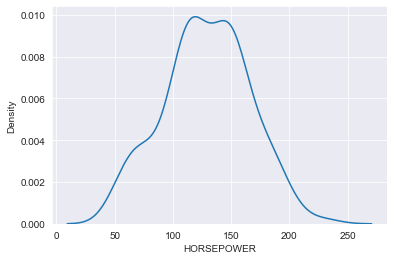

In [70]:
x,y = sns.distplot(listings_numeric['HORSEPOWER'], hist=False).get_lines()[0].get_data()
print(x)
#print(y)

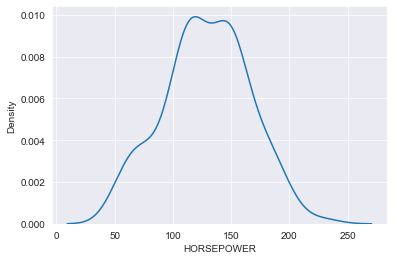

In [38]:
x,y = sns.kdeplot(listings_numeric['HORSEPOWER']).get_lines()[0].get_data()

In [77]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
        The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """

    o = len(coeffs)
    rev_coeffs = coeffs[::-1]
    print(f'# This is a polynomial of order {o}.')
    y = 0
    for i in range(o):
        y += rev_coeffs[i] * x ** i

    return y


In [98]:
function4 = np.poly1d(np.polyfit(x,y, 4))
function5 = np.polyfit(x,y, 5)
function8 = np.polyfit(x,y, 8)
function10 = np.polyfit(x,y, 10)
function12 = np.polyfit(x,y, 12)
function13 = np.polyfit(x,y, 13)
function14 = np.polyfit(x,y, 14)
function15 = np.polyfit(x,y, 15)
function20 = np.polyfit(x,y, 20)

C:\Users\jccli\PycharmProjects\akina\venv\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:

print(function10)

[-4.78299758e-23  6.42776877e-20 -3.61457894e-17  1.09813037e-14
 -1.93870619e-12  1.98347563e-10 -1.08605685e-08  2.23974460e-07
  4.91420400e-06 -2.26596607e-04  1.85782554e-03]


In [100]:
# f = -1.88143044e-13 * pow(fx,5) + 1.97031937e-10 * pow(fx,4) + -6.78677633e-08 * pow(fx,3) + 8.93899760e-06 * pow(fx,2) + -3.54868029e-04 * fx + 4.00692692e-03

# This is a polynomial of order 15.


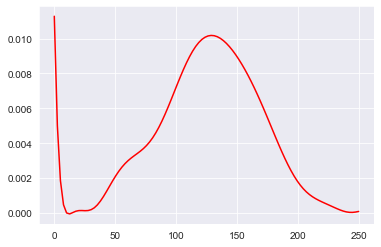

In [105]:
fx = np.linspace(0,250,100)

# THIS IS THE FUNCTION FOR p = 5, HORSEPOWER FEATURE
#f = -1.88143044e-13 * pow(fx,5) + 1.97031937e-10 * pow(fx,4) + -6.78677633e-08 * pow(fx,3) + 8.93899760e-06 * pow(fx,2) + -3.54868029e-04 * fx + 4.00692692e-03
# THIS IS THE FUNCTION FOR p = 4, HORSEPOWER FEATURE
#f = 6.533e-11 *pow(fx,4) - 3.459e-08 *pow(fx,3) + 5.288e-06 *pow(fx,2)  - 0.0001919 *pow (fx,1) + 0.001907
f = PolyCoefficients(fx, function14)


fig = plt.figure()

#ax = fig.add_subplot(1, 1, 1)
#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(fx, f, 'r')

# show the plot
plt.show()

In [76]:
#print(function)

In [41]:
#f_von_x = function[0] * pow(fx,5) + function[1] * pow(fx,4) + function[2] * pow(fx,3) + function[3] * pow(fx,2) + function[4] * pow(fx,1) + function[5]